<a href="https://colab.research.google.com/github/VenusPower0/HackBio-Internship-Coding-For-Bio-Python-R/blob/main/stage2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5000 non-null   int64  
 1   Gender              5000 non-null   object 
 2   Age                 5000 non-null   int64  
 3   Race                5000 non-null   object 
 4   Education           3584 non-null   object 
 5   MaritalStatus       3585 non-null   object 
 6   RelationshipStatus  3585 non-null   object 
 7   Insured             4993 non-null   object 
 8   Income              4623 non-null   float64
 9   Poverty             4675 non-null   float64
 10  HomeRooms           4972 non-null   float64
 11  HomeOwn             4972 non-null   object 
 12  Work                3842 non-null   object 
 13  Weight              4969 non-null   float64
 14  Height              4841 non-null   float64
 15  BMI                 4834 non-null   float64
 16  Pulse 

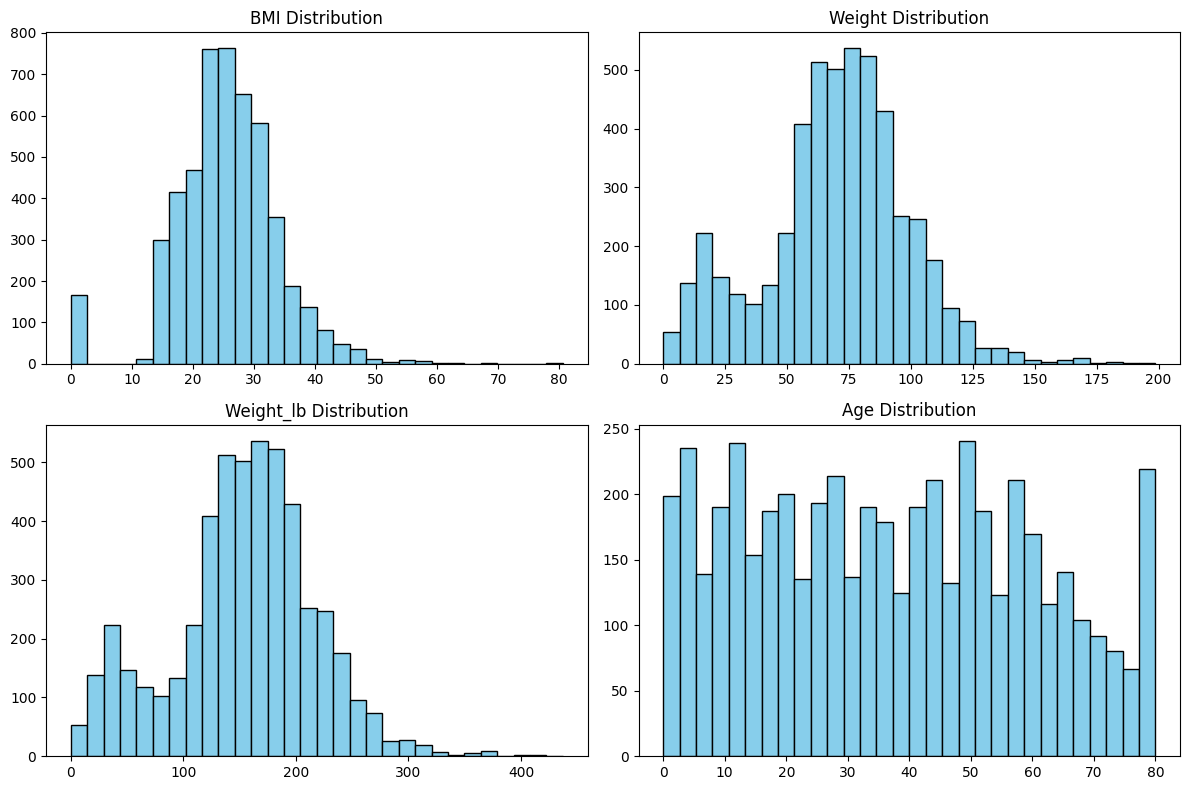

Mean Pulse: 63.06
Possible Diastolic BP Columns: ['BPDia', 'Diabetes', 'DiabetesAge']
Income Variance: 1264147753.5507102
Income Std Dev: 35554.85555519401


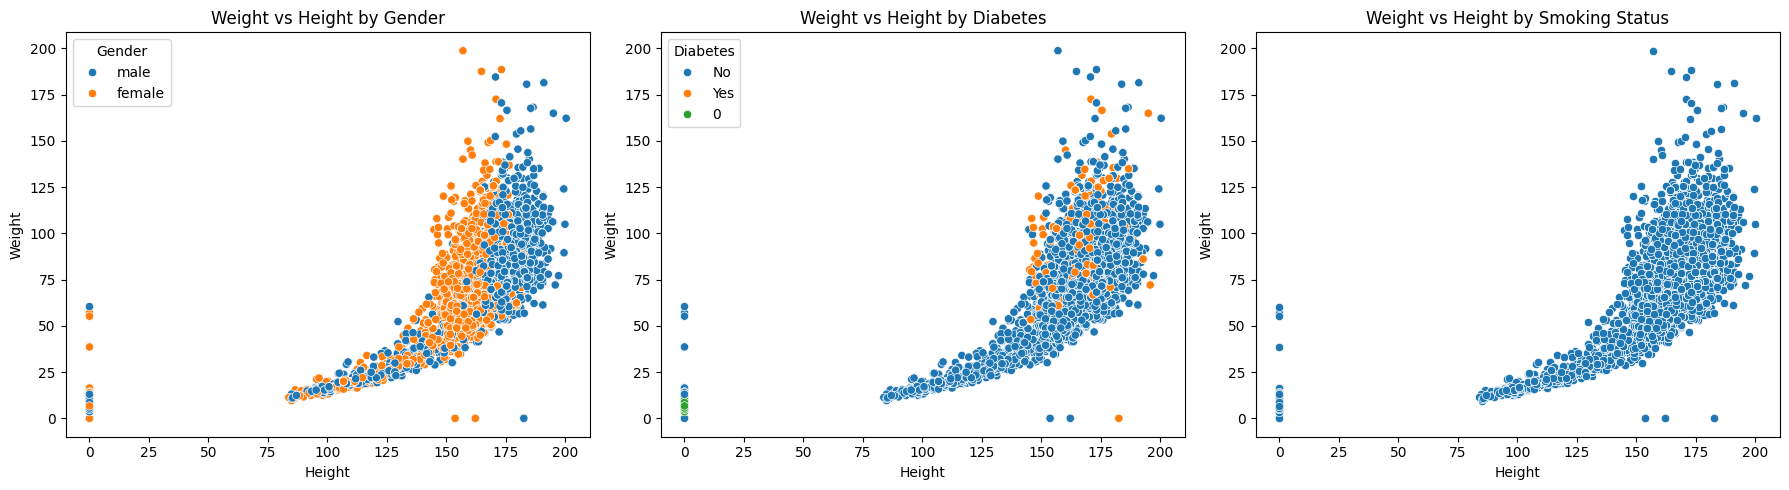

T-Test: Age vs Gender | P-Value: 0.08020
  ➤ No significant difference (fail to reject null hypothesis)

Cannot perform t-test for Diabetes (not binary)
Cannot perform t-test for MaritalStatus (not binary)


In [7]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Load dataset
url = "https://raw.githubusercontent.com/HackBio-Internship/public_datasets/main/R/nhanes.csv"
df = pd.read_csv(url)

# Check initial info
print(df.info())

# ---------- 1. HANDLE NA VALUES ----------
# Drop or fill NAs (We'll fill with 0 for this task)
df.fillna(0, inplace=True)

# ---------- 2. HISTOGRAMS FOR BMI, WEIGHT, WEIGHT (lbs), AGE ----------
df['Weight_lb'] = df['Weight'] * 2.2

plt.figure(figsize=(12, 8))
for i, column in enumerate(['BMI', 'Weight', 'Weight_lb', 'Age']):
    plt.subplot(2, 2, i+1)
    plt.hist(df[column], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'{column} Distribution')
plt.tight_layout()
plt.show()

# ---------- 3. MEAN 60-SECOND PULSE ----------
print("Mean Pulse:", df['Pulse'].mean())

# ---------- 4. RANGE OF DIASTOLIC BLOOD PRESSURE ----------
bp_col = [col for col in df.columns if 'Dia' in col or 'BPDia' in col]
print("Possible Diastolic BP Columns:", bp_col)
# Assume it's 'BPDiaAve' if available
if 'BPDiaAve' in df.columns:
    print("BPDiaAve Range:", df['BPDiaAve'].min(), "-", df['BPDiaAve'].max())

# ---------- 5. VARIANCE AND STD OF INCOME ----------
print("Income Variance:", df['Income'].var())
print("Income Std Dev:", df['Income'].std())

# ---------- 6. SCATTER PLOT WEIGHT vs HEIGHT COLORED ----------
plt.figure(figsize=(18, 5))

# a. By Gender
plt.subplot(1, 3, 1)
sns.scatterplot(x='Height', y='Weight', hue='Gender', data=df)
plt.title('Weight vs Height by Gender')

# b. By Diabetes
plt.subplot(1, 3, 2)
sns.scatterplot(x='Height', y='Weight', hue='Diabetes', data=df)
plt.title('Weight vs Height by Diabetes')

# c. By Smoking Status
plt.subplot(1, 3, 3)
sns.scatterplot(x='Height', y='Weight', data=df)
plt.title('Weight vs Height by Smoking Status')

plt.tight_layout()
plt.show()

# ---------- 7. T-TESTS ----------
def run_ttest(group_col, target_col):
    group_vals = df[group_col].unique()
    if len(group_vals) == 2:
        group1 = df[df[group_col] == group_vals[0]][target_col]
        group2 = df[df[group_col] == group_vals[1]][target_col]
        stat, pval = ttest_ind(group1, group2)
        print(f"T-Test: {target_col} vs {group_col} | P-Value: {pval:.5f}")
        if pval < 0.05:
            print("  ➤ Significant difference (reject null hypothesis)")
        else:
            print("  ➤ No significant difference (fail to reject null hypothesis)\n")
    else:
        print(f"Cannot perform t-test for {group_col} (not binary)")

# a. Age vs Gender
run_ttest('Gender', 'Age')

# b. BMI vs Diabetes
run_ttest('Diabetes', 'BMI')

# c. AlcoholYear vs Relationship Status
run_ttest('MaritalStatus', 'AlcoholYear')
